# Particle Sinking Model 

In [8]:
from ballasting import model, plot

bottom_depth = 3000  # m

## End-Members: POC or PIC only

  0%|          | 0/800 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

POC only
[nan] [nan]
PIC only
[5.5650274e-06] [1.77368739]


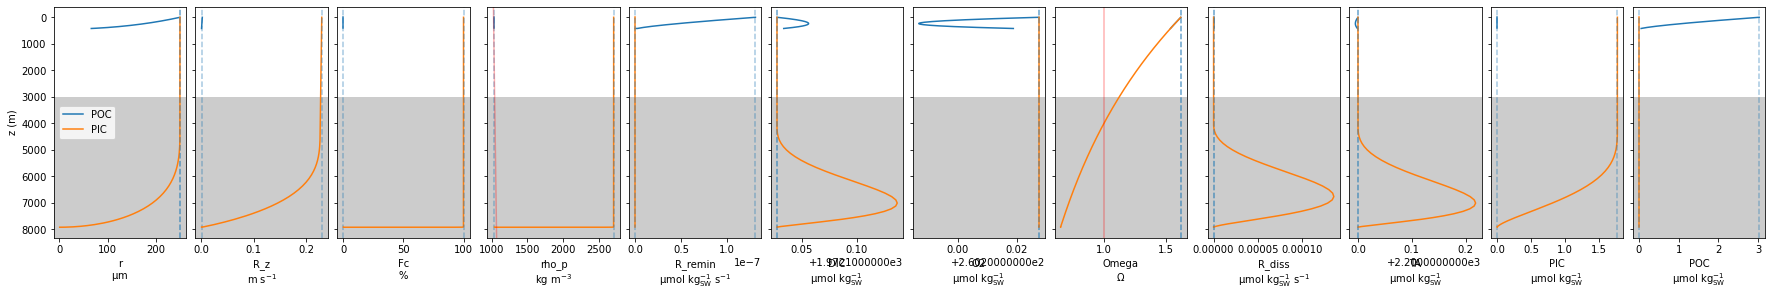

In [9]:
mPOC = model.sinking_particles(N=1, tmax_days=10, PIC_POC=0)
mPIC = model.sinking_particles(N=1, PIC_POC=1e6)

plot.models([mPOC, mPIC], bottom_depth=bottom_depth, model_labels=['POC', 'PIC']);

# particulate carbon remaining at 2000m in umol kgSW-1
print('POC only')
zs = model.depth_slice(bottom_depth, mPOC)
print(zs['POC'], zs['PIC'])

print('PIC only')
zs = model.depth_slice(bottom_depth, mPIC)
print(zs['POC'], zs['PIC']) 

## Influence of PIC:POC ratio

Here, we'll run three models varying the PIC:POC ratio of the particles (0.01, 0.1 and 0.2).

Before you run the cell below, think about:
- How would you expect the sinking speed of particles to change as you add CaCO3?
- Which scenario will export the most organic carbon to the sea bed?

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

  0%|          | 0/1200 [00:00<?, ?it/s]

var [0.05, 0.1, 0.2]
POC [1037.6837965  2060.56037059 3049.64512867]
PIC [ 87.92790613 169.32490878 328.97005384]


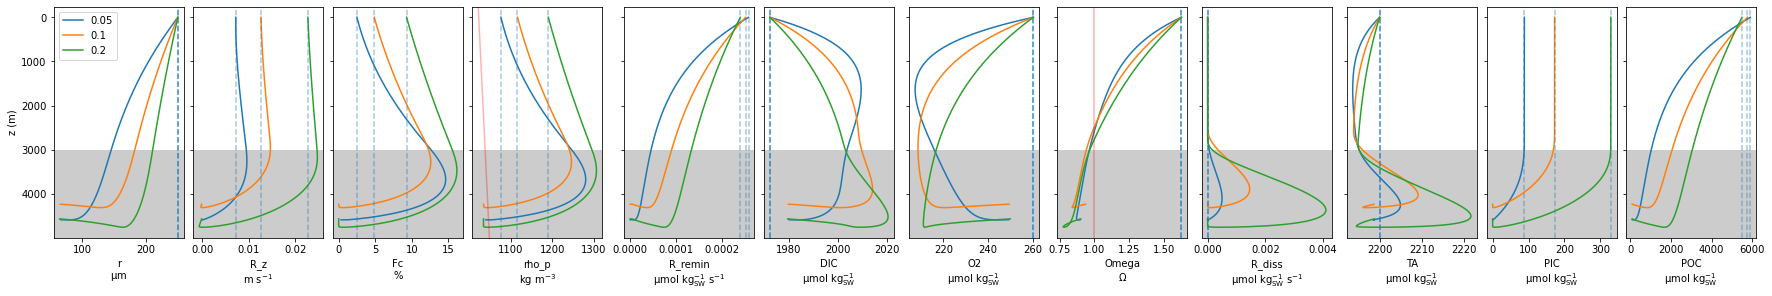

In [20]:
var = [0.05, 0.1, 0.2]  # PIC:POC ratios to use
models = [model.sinking_particles(PIC_POC=v, tsteps=1200) for v in var]
plot.models(models, model_labels=var, bottom_depth=bottom_depth)

# calculate particles reaching sea bed
zs = model.depth_slice(bottom_depth, models)
print('var', var)
print('POC', zs['POC'])
print('PIC', zs['PIC'])

Now you've seen the zepth profiles, notice that the relationship betwen PIC:POC and POC export is not linear. Why? Can you see clues in the other profiles?

## Feedbacks

CaCO3 production won't be the only thing that changes in future. We can use this model to think about how other factors will alter the biological pump and ballasting.

### Remineralisation Rate
Increases in ocean temperature might increase remineralisation rate in future.

- Will particles with a low or high remineralisation rate sink faster?
- How would you expect increasing remineralisation rate (decreasing `p_lifetime`) to influence export?

Modify the code below to change `p_lifetime` to 1, 2.5 and 5.

In [ ]:
var = [0.01, 0.1, 0.2]  # the values of the chosen variable that you want to use
#      ^ change these values

models = [model.sinking_particles(PIC_POC=v, tsteps=1200) for v in var]
#                                 ^ change the name of the parameter you're varying

plot.models(models, model_labels=var, bottom_depth=bottom_depth)

# calculate particles reaching sea bed
zs = model.depth_slice(bottom_depth, models)
print('var', var)
print('POC', zs['POC'])
print('PIC', zs['PIC'])

Did the patterns match what you were expecting? If not, why?

### Mineralogy

If the carbonate is high-Mg calcite, or a metastable phase such as amorphous calcium carbonate or vaterite, it will be more soluble.

- How would increasing mineral solubility change export patterns?

Evaluate this by modifying `f_solubility`.

- At what solubility does export stop completely?

In [ ]:
# put code here.